In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

In [3]:
data = pd.read_csv("Housing.csv")

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("Shape of the data",data.shape)
data.info()

Shape of the data (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
numerical_data_inspaction = data.drop(['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis=1)
numerical_data_inspaction


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [7]:
numerical_data_inspaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

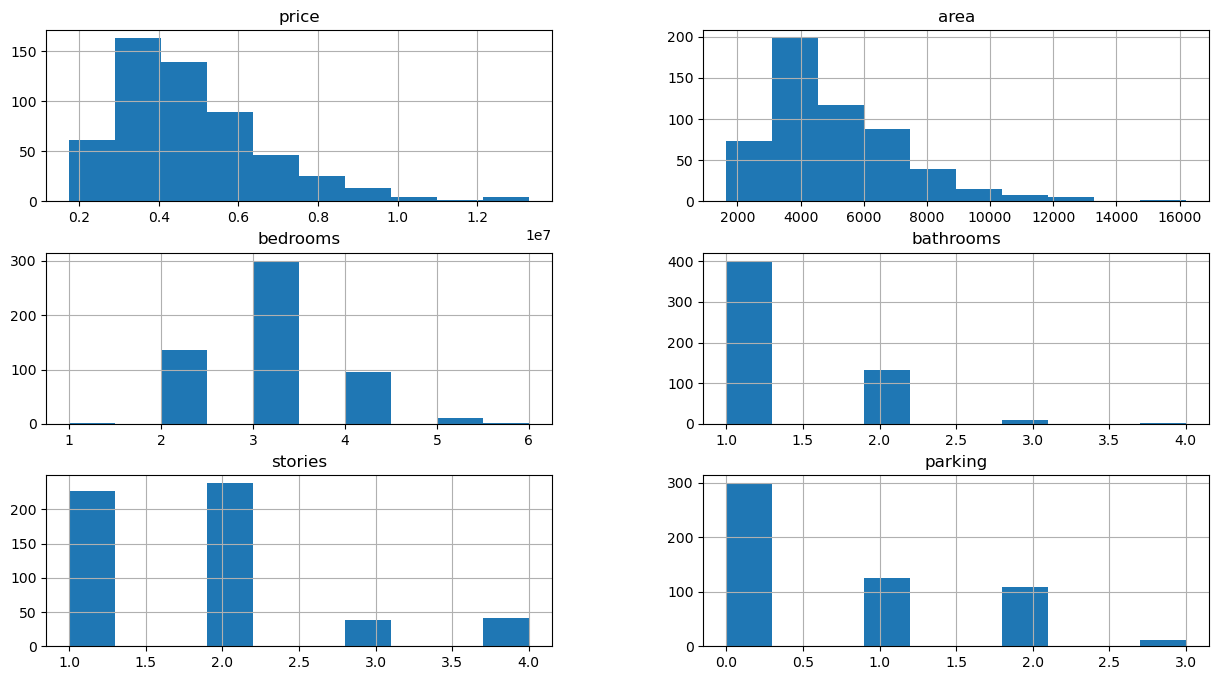

In [8]:
numerical_data_inspaction.hist(figsize = (15,8))

<Axes: >

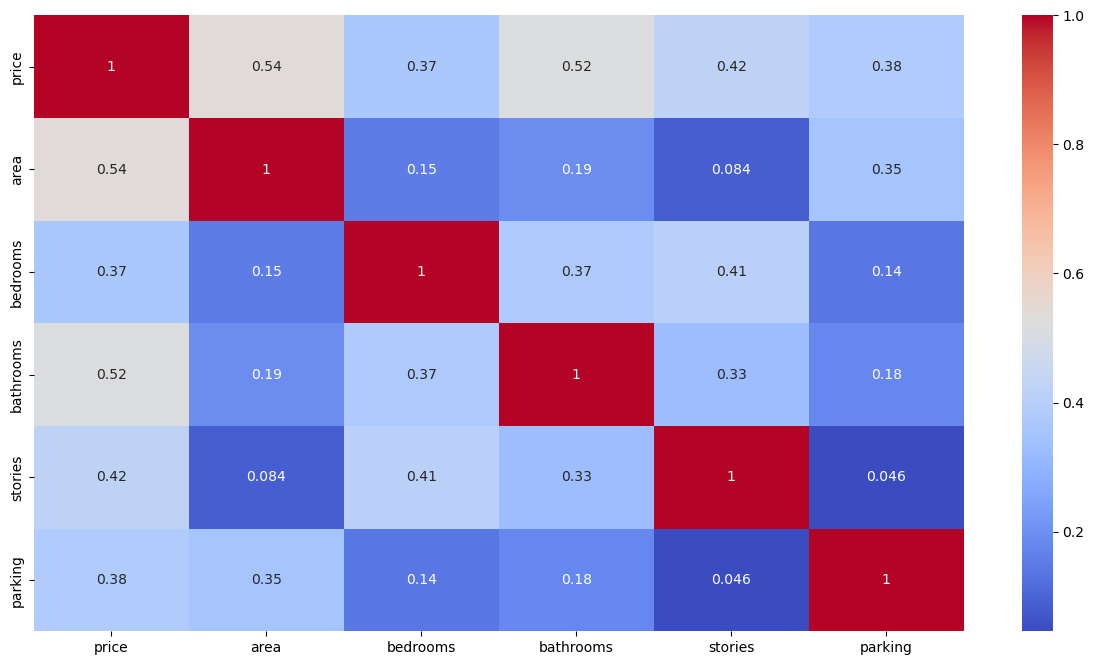

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(numerical_data_inspaction.corr(), annot = True, cmap="coolwarm")

### price is moderately correlated with area (0.54), bathrooms (0.52), and stories (0.42).These variables are likely strong predictors of house prices.

### Both price and area histograms are skewed to the right, with a few outliers in higher ranges.

In [10]:
numerical_data_inspaction['price'] = np.log(numerical_data_inspaction['price'] + 1)
numerical_data_inspaction['area'] = np.log(numerical_data_inspaction['area'] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

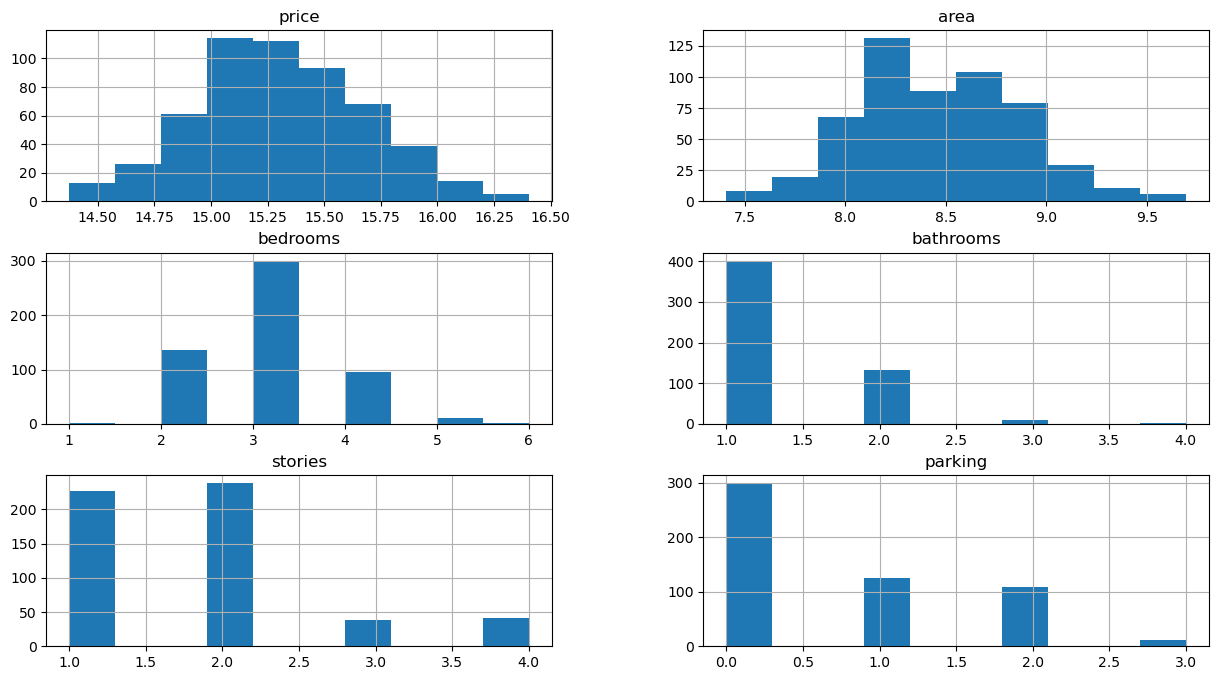

In [11]:
numerical_data_inspaction.hist(figsize = (15,8))

<Axes: xlabel='area', ylabel='price'>

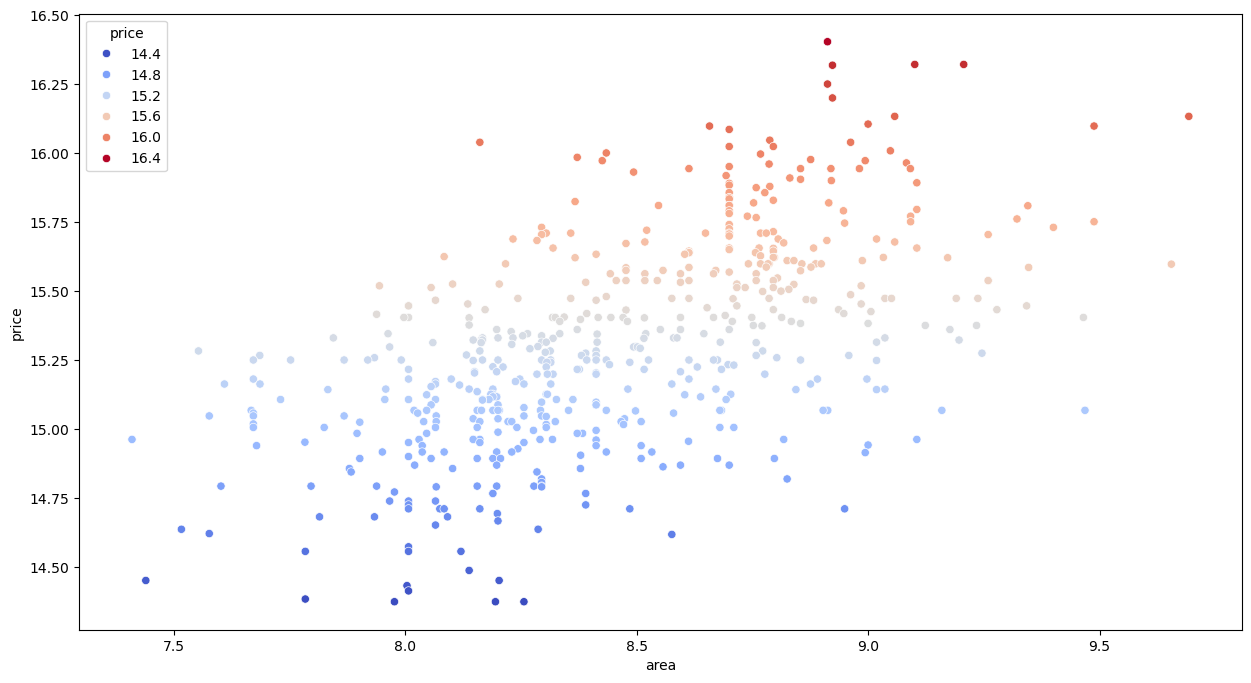

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='area', y='price', data = numerical_data_inspaction, hue="price", palette="coolwarm")

<Axes: xlabel='bedrooms', ylabel='price'>

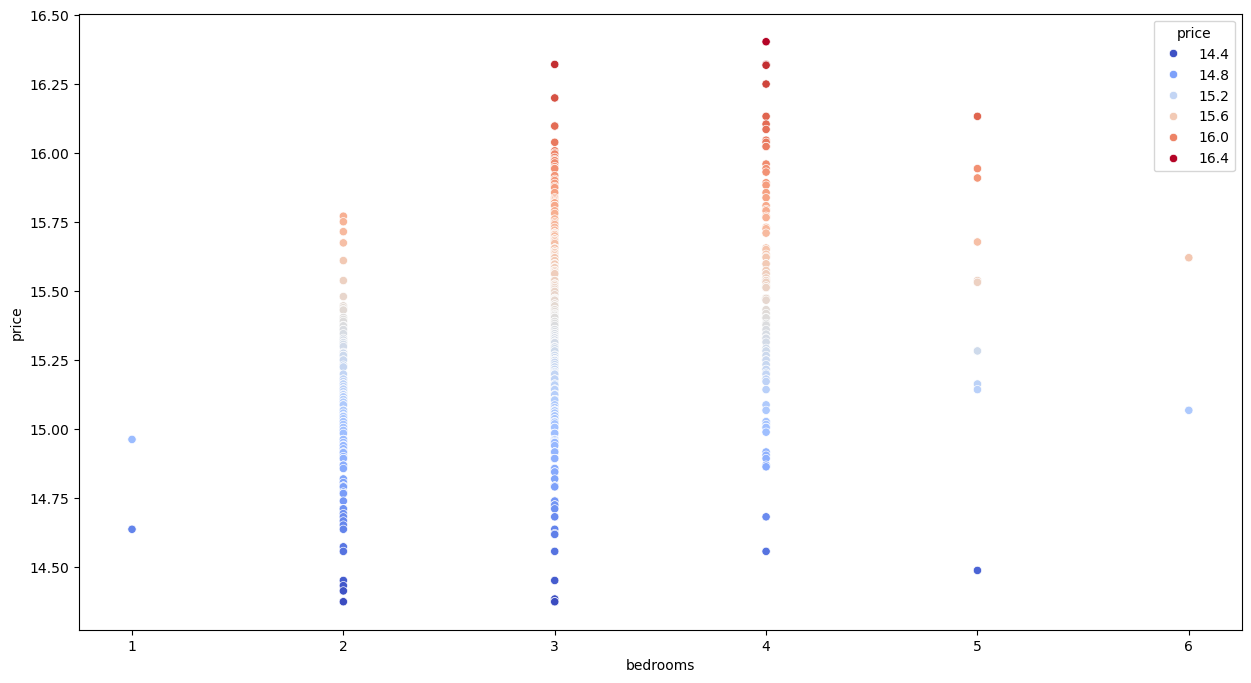

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bedrooms', y='price', data = numerical_data_inspaction, hue="price", palette="coolwarm")

<Axes: xlabel='parking', ylabel='price'>

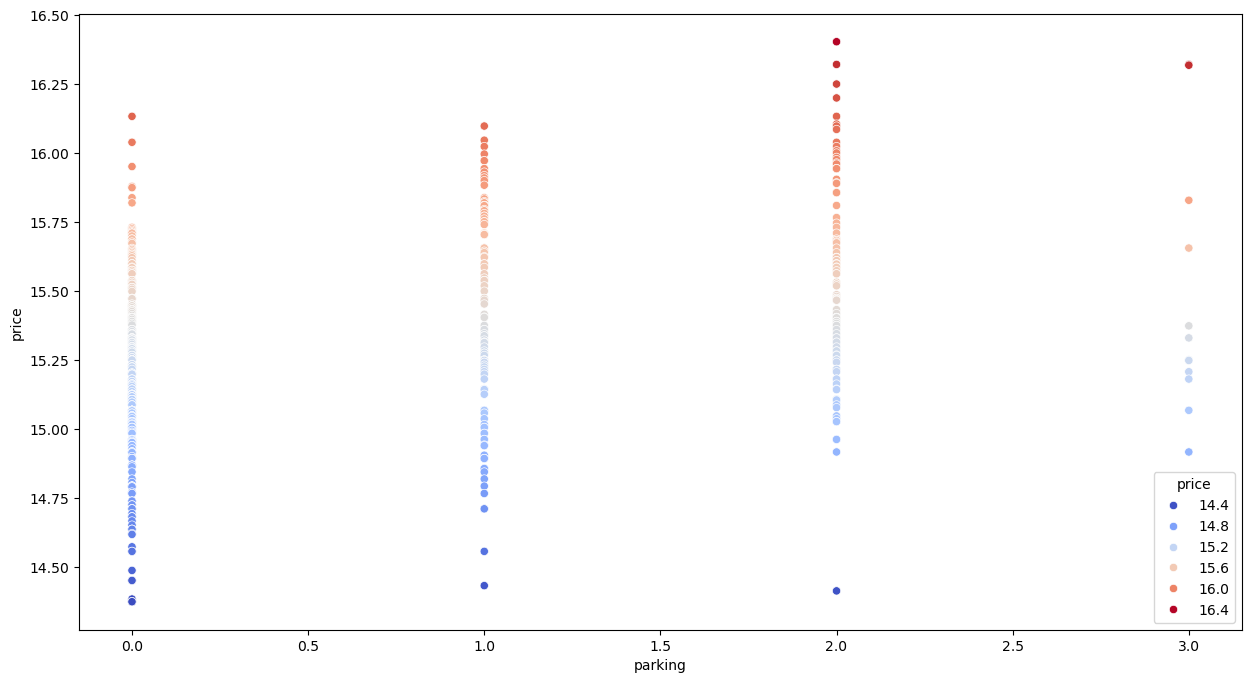

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='parking', y='price', data = numerical_data_inspaction, hue="price", palette="coolwarm")

### Now the price and area are sckewed to the center and everything is good to go to Feature Enginerring

# The Model

In [15]:
from sklearn.model_selection import train_test_split

X = numerical_data_inspaction.drop(['price'], axis=1)
Y = numerical_data_inspaction['price']

In [16]:
Y.shape

(545,)

In [17]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
Y_train

,area,bedrooms,bathrooms,stories,parking
179,8.064951,3,2,2,2
536,8.137688,5,1,2,0
281,8.412055,2,1,1,2
271,7.552762,5,1,2,0
155,8.716208,3,2,1,2
...,...,...,...,...,...
190,8.936035,4,1,2,2
223,8.751791,3,1,2,1
141,8.804025,4,2,2,1
193,8.476580,2,1,1,0


In [19]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {Y_train.shape}, y Type:{type(Y_train)})")
print(Y_train)
print(f"y Shape: {Y_train.shape}, y Type:{type(Y_train)})")
print(Y)

X Shape: (436, 5), X Type:<class 'pandas.core.frame.DataFrame'>)
         area  bedrooms  bathrooms  stories  parking
398  8.045909         3          1        2        1
233  8.333511         3          1        1        0
150  8.544225         3          1        2        0
103  8.756368         3          2        3        0
225  8.770439         2          1        1        3
..        ...       ...        ...      ...      ...
399  8.902592         2          1        1        1
535  8.119994         2          1        1        1
494  8.824825         2          1        1        0
266  8.493105         3          1        1        2
291  7.990915         3          1        2        0

[436 rows x 5 columns]
y Shape: (109, 5), y Type:<class 'pandas.core.frame.DataFrame'>)
         area  bedrooms  bathrooms  stories  parking
179  8.064951         3          2        2        2
536  8.137688         5          1        2        0
281  8.412055         2          1        1        

In [20]:
# Number of features (excluding the target variable)
num_features = 5

# Initialize parameters
b_init = 0  # Intercept
w_init = np.zeros(num_features)  # Coefficients for the features

print("Initial parameters:")
print(f"Intercept (B): {b_init}")
print(f"Coefficients (w1 to w5): {w_init}")
w_init.shape

Initial parameters:
Intercept (B): 0
Coefficients (w1 to w5): [0. 0. 0. 0. 0.]


(5,)

In [21]:
def predict(x, w, b):
    p = np.dot(x, w) + b     
    return p    

In [22]:
# Example data
x = np.random.rand(545, 5)  # 545 samples, 5 features
w = np.array([0.2, 0.1, -0.3, 0.5, 0.4])  # Example weights
b = 0.1  # Example intercept

# Prediction
predictions = predict(x, w, b)
print(predictions)


[0.84199138 0.38048679 0.70926307 0.13996969 0.44725663 0.30527977
 0.78500507 0.87078251 0.29126856 0.28180868 0.50530509 0.29716155
 0.59112709 0.88638301 0.29616268 0.37205945 0.71008282 0.56746457
 0.79643715 0.47063083 0.83771181 0.87097074 0.36428367 0.40611378
 1.11902937 0.56855419 0.31901792 0.33201097 0.42333461 0.83038337
 0.92926058 0.52444339 0.64079112 0.45065556 0.504596   0.70029419
 0.37630604 0.79481008 0.30156507 0.63996335 0.37960726 0.35887733
 0.39153987 0.69090287 0.56335801 0.46523045 0.69570538 0.58225407
 0.5246997  0.63602232 0.44365492 0.5275963  0.68013252 0.50976805
 0.09856813 0.52156053 0.45154224 0.84399002 0.83614644 0.42797888
 1.02324581 0.79678141 0.65495371 0.59079699 0.37728197 0.88098029
 0.62028095 0.69631811 0.64300785 0.12614636 0.23285487 0.50595909
 0.38185784 0.41014963 0.29043571 0.83419424 0.4545781  0.49403738
 0.88561676 0.17139851 0.62095592 0.72957105 0.54149402 0.50664207
 1.08880488 0.89964523 0.15140497 0.31468416 0.6694435  0.6652

In [23]:
def compute_cost(X, y, w, b): 
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost


In [24]:
X_train_np = X_train.values  # Convert DataFrame to NumPy array
#Y_train_np = Y_train.values  # Convert Series to NumPy array
Y_train_np = Y_train.values.ravel()

cost = compute_cost(X_train_np, Y_train_np, w_init, b_init)
print(f'Cost at initial w, b: {cost}')


Cost at initial w, b: 8.924063699332853


# 5 Gradient Descent 

In [25]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [26]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train_np, Y_train_np, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -3.091869925331733
dj_dw at initial w,b: [-26.08668274  -8.97973231  -3.95660774  -5.58141076  -1.87917031]


In [27]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [54]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.00999999999
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train_np, Y_train_np, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train_np[i], w_final) + b_final:0.2f}, target value: {Y_train_np[i]}")

Iteration    0: Cost     4.29   
Iteration  100: Cost     4.16   
Iteration  200: Cost     4.14   
Iteration  300: Cost     4.13   
Iteration  400: Cost     4.13   
Iteration  500: Cost     4.13   
Iteration  600: Cost     4.13   
Iteration  700: Cost     4.13   
Iteration  800: Cost     4.13   
Iteration  900: Cost     4.12   
b,w found by gradient descent: 0.20,[ 0.4125689  -0.34000281  0.28132525  0.12346043 -0.27877375] 
prediction: 2.74, target value: 8.064950891749143
prediction: 3.02, target value: 3.0
prediction: 3.23, target value: 2.0
prediction: 3.72, target value: 2.0
prediction: 2.70, target value: 2.0
prediction: 2.44, target value: 8.137688184977605
prediction: 2.69, target value: 5.0
prediction: 3.01, target value: 1.0
prediction: 3.57, target value: 2.0
prediction: 3.26, target value: 0.0
prediction: 3.30, target value: 8.412054873292933
prediction: 3.63, target value: 2.0
prediction: 3.32, target value: 1.0
prediction: 2.40, target value: 1.0
prediction: 3.31, target 

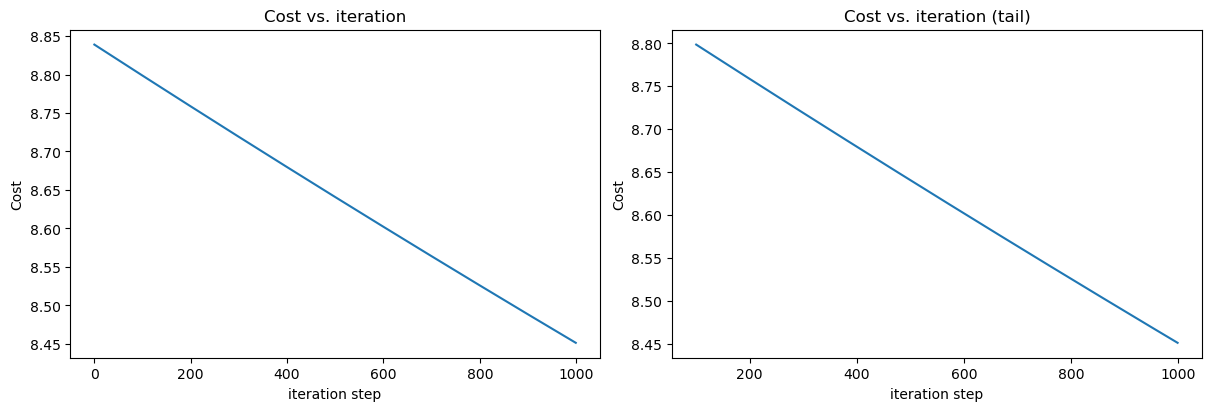

In [94]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [68]:
linear_model = LinearRegression()
scaler = StandardScaler()

X_train, Y_train = numerical_data_inspaction.drop(['price'], axis=1), numerical_data_inspaction['price']
X_train_s = scaler.fit_transform(X_train)


linear_model.fit(X_train_s, Y_train)

LinearRegression()

In [66]:
X_test, Y_test = numerical_data_inspaction.drop(['price'], axis=1), numerical_data_inspaction['price']

In [70]:
X_test_s = scaler.fit_transform(X_test)

In [72]:
linear_model.score(X_test_s,Y_test)

0.5656570061000534

In [73]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [0.16201573 0.03299304 0.09670655 0.08941311 0.05389998], b = 15.31


In [77]:
regr = LinearRegression()

In [79]:
regr.fit(X_train_s, Y_train)

LinearRegression()

In [80]:
y_pred = regr.predict(X_test_s)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Coefficients: 
 [0.16201573 0.03299304 0.09670655 0.08941311 0.05389998]
Mean squared error: 0.06
Coefficient of determination: 0.57


In [88]:
X_test_s.shape

(545, 5)

In [89]:
Y_test.shape

(545,)

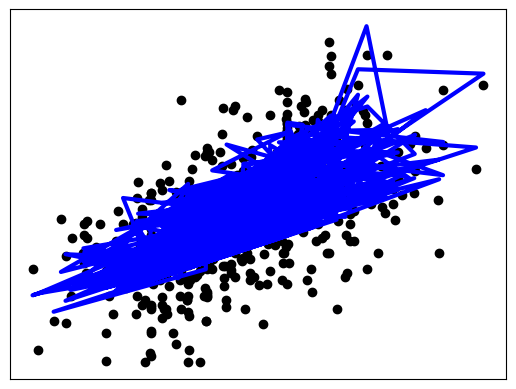

In [93]:
# Plot outputs
plt.scatter(X_test_s[:,0], Y_test, color="black")
plt.plot(X_test_s[:,0], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

RandomForestRegressor()

In [98]:
forest.score(X_test, Y_test)

0.9116562519024013

C:\Users\windows 11\AppData\Local\Temp\ipykernel_6952\1382087627.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', linewidth=2, color="red")  # Perfect prediction line


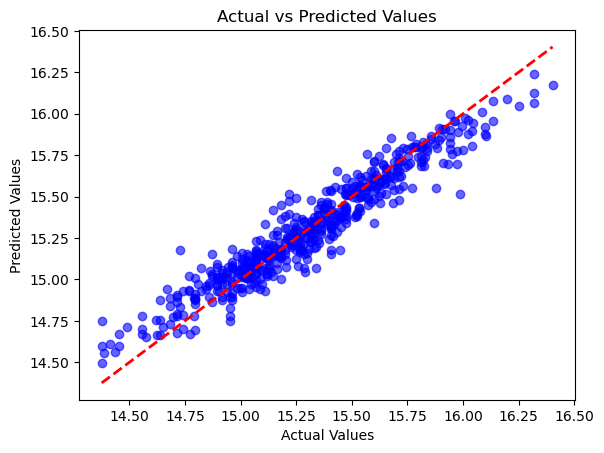

In [99]:
# Predictions from the model
y_pred = forest.predict(X_test)

# Scatter plot of Actual vs Predicted values
plt.scatter(Y_test, y_pred, color="blue", alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', linewidth=2, color="red")  # Perfect prediction line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


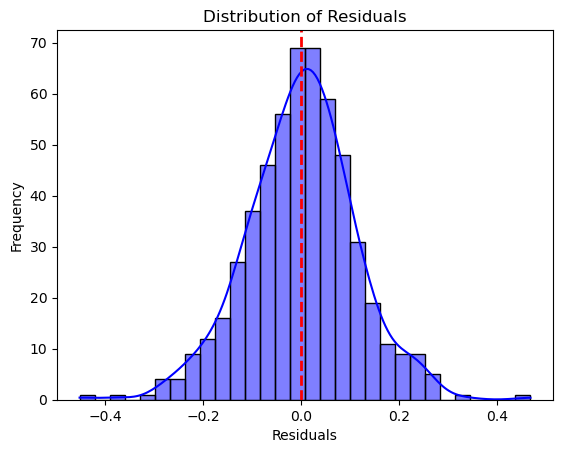

In [101]:
import seaborn as sns
residuals = Y_test - y_pred
# Distribution of residuals
sns.histplot(residuals, kde=True, color="blue", bins=30)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
